<a href="https://colab.research.google.com/github/mohd-faizy/07P_Exploratory_Data_Analysis_With_Seaborn/blob/master/01_Tumor_Diagnosis_EDA_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Tumor Diagnosis: Part-1 Exploratory Data Analysis__




<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### __About the Dataset:__

>The [__Breast Cancer Diagnostic data__](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the __UCI Machine Learning Repository__. This database is also available through the [__UW CS ftp server__](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

_Features are computed from a digitized image of a __fine needle aspirate (FNA)__ of a breast mass. They describe characteristics of the __cell nuclei__ present in the image. n the 3-dimensional space is that described in: [__K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34__]._

**Attribute Information**:

- ID number
- Diagnosis (M = Malignant, B = Benign) 3-32)

### __Ten real-valued features are computed for each cell nucleus:__

1. __radius__ (mean of distances from center to points on the perimeter) 
2. __texture__ (standard deviation of gray-scale values) 
3. __perimeter__ 
4. __area__ 
5. __smoothness__ (local variation in radius lengths) 
6. __compactness__ (perimeter^2 / area - 1.0) 
7. __concavity__ (severity of concave portions of the contour) 
8. __concave points__ (number of concave portions of the contour)
9. __symmetry__
10. __fractal dimension__ ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

__Class distribution:__ $357$ $\rightarrow$ $Benign$ - | - $212$ $\rightarrow$ $Malignant$

## __Loading Libraries and Data__

In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_data_A.csv to breast_cancer_data_A.csv


In [2]:
import seaborn as sns               # Much better visualizations
import numpy as np                  # For mathematical operations
import pandas as pd                 # For working with .csv file
import time                         # Python time library
import sklearn

from IPython.display import display
from pandas import Series, DataFrame

import matplotlib.pyplot as plt     # For general visualizations
#keep every visualization inside the browser window
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('/content/breast_cancer_data_A.csv')

<h2 align=center> Exploratory Data Analysis </h2>

---

## __Separate Target from Features__

In [4]:
print("Number of Data Points: {}".format(dataset.shape[0])) #print number of data points
print("Number of Features/Attributes: {}".format(dataset.shape[1])) # print number of features
print("Features/Attributes:", dataset.columns) # print the list of all features in the dataset 

Number of Data Points: 569
Number of Features/Attributes: 33
Features/Attributes: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
dataset.head(-10) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.02153,0.038980,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,0.2199,2.2390,1.437,14.46,0.012050,0.02736,0.048040,0.017210,0.01843,0.004938,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.0900,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,0.5375,2.9270,3.618,29.11,0.011590,0.01124,0.000000,0.000000,0.03004,0.003324,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969,NaN



__Key Feature from Data frame head__

---


- $id$ _Column_: contain the unique ids,  therefore cannot be used for classification.

- $diagonsis$ _column_: With the _binary Values_ $\rightarrow$ Target column containing the class $labels$
  - $M$ - $Malignant$ $\rightarrow$ Tending to invade normal tissue 
  - $B$ - $Benign$ $\rightarrow$ not harmful in effect.

- $Unnamed: 32$: Contain the `NaN` in the Entire column - Not necessary for the analysis.
 


In [6]:
# Creating the Target Class
# Storing the Class label or Target in --> y (M or B) 
y_target = dataset.diagnosis   

# Making a list of unwanted columns 
list = ['Unnamed: 32','id','diagnosis']

# Dropping the unnecessary Column
data = dataset.drop(list,axis = 1 ) # Dropping Column `axis = 1`, for rows `axis = 0` 
data.head(-10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.02153,0.038980,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,0.2199,2.2390,1.437,14.46,0.012050,0.02736,0.048040,0.017210,0.01843,0.004938,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.0900,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,0.5375,2.9270,3.618,29.11,0.011590,0.01124,0.000000,0.000000,0.03004,0.003324,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969


In [7]:
print("Number of Data Points: {}".format(data.shape[0])) 
print("Number of Features/Attributes: {}".format(data.shape[1])) 
print("Features/Attributes:", data.columns) 

Number of Data Points: 569
Number of Features/Attributes: 30
Features/Attributes: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### __Creating the Pairplot from Seaborn__

In [8]:
"""
Create dataset for finding contribution of individual features towards whether 
or not a certain cancer tumor is malignant or benign. 
"""

# Map values in diagnosis column, 0 representing benign  and 1 represeting malignant 
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1}) 
data_for_corr = dataset[['radius_mean', 'perimeter_mean', 'area_mean',
                               'compactness_mean', 'concavity_mean',
                               'concave points_mean', 'diagnosis']]
#Create data_for_corr with various features and diagnosis 
data_for_corr.head() 

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,1


$B$ $\rightarrow$ $0$

$M$ $\rightarrow$ $1$

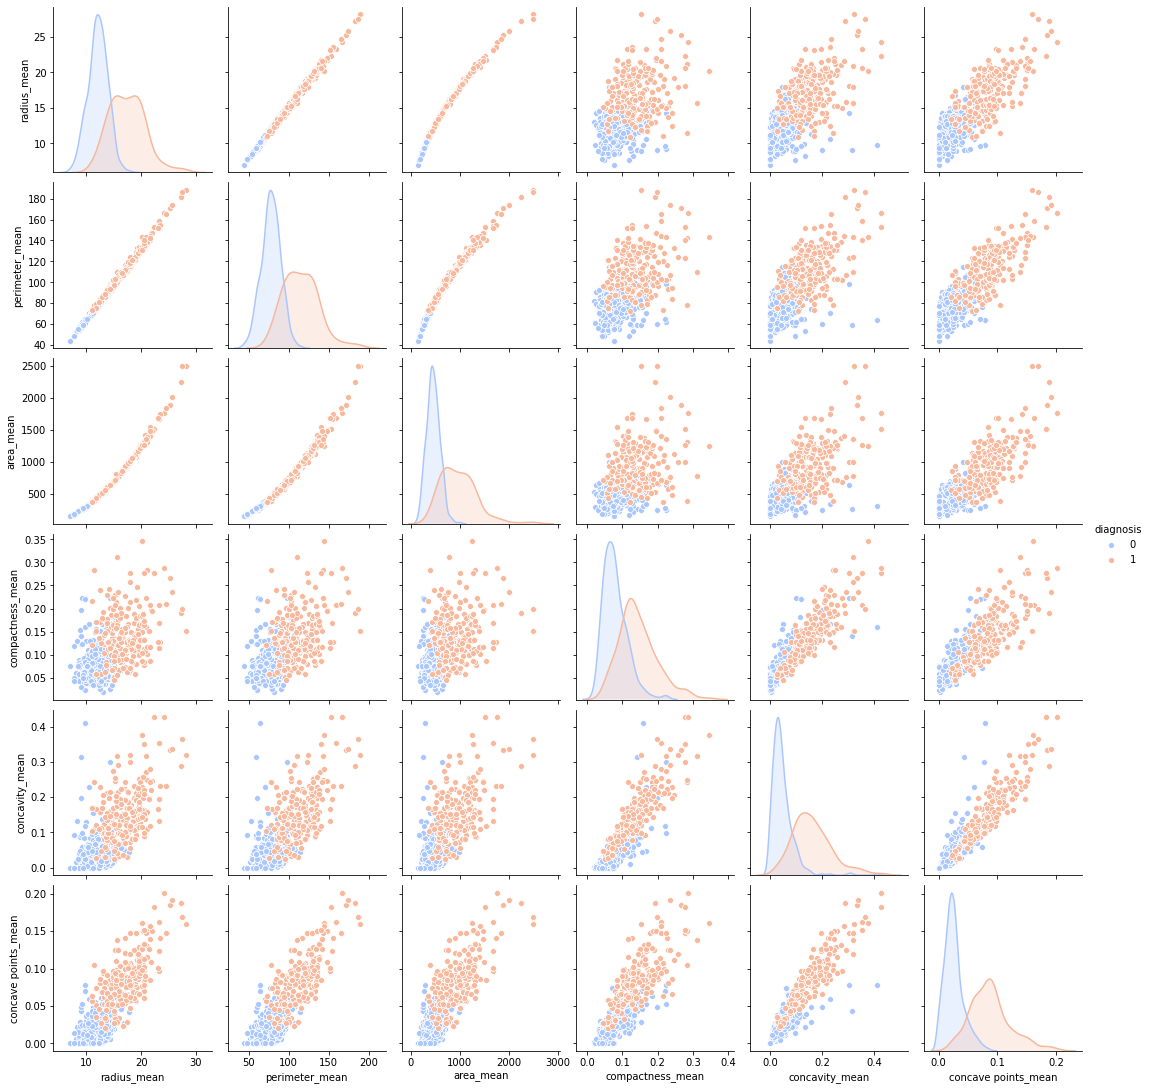

In [9]:
"""
Create Pairplot from Seaborn to see relationship between individual features and diagnosis
"""
sns.pairplot(data_for_corr, palette='coolwarm',hue= 'diagnosis')

## __Task 3: Plot Diagnosis Distributions__

__Now we have the two data frames:__

- for the class labels $y$
- other for the features $x$

> **Why Class Imbalance is this a problem?**

> Most __Machine learning__ algorithms assume data equally distributed. So when we have a __Class imbalance__, the machine learning __Classifier__ tends to be more $biased$ towards the majority class, _causing bad classification of the minority class_.

[__Class Imbalance: a classification headache__](https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4)

Number of Benign:  357
Number of Malignant :  212


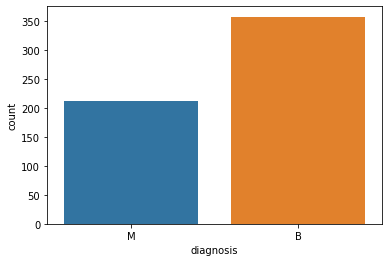

In [10]:
# checking the distribution for Target Varible using seaborn library:
ax = sns.countplot(y_target, label="Count") # countplot: tells us the count of each class in column.
B, M = y_target.value_counts() # Using -`value_counts` from the Pandas to store the individual count.
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

In [11]:
data.describe() # Pandas:- descriptive statistics

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2 align=center> Data Visualization </h2>

---

## __Task 4: Visualizing Standardized Data with Seaborn__

__Violin Plots:__

In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

- __Median__ (a white dot on the violin plot).
- __Interquartile range__ (the black bar in the center of violin).
- The __lower/upper adjacent values__ (the black lines stretched from the bar) — defined as `first quartile — 1.5 IQR` and `third quartile + 1.5 IQR` respectively. These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.

![Violin Plots](https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png)


The unquestionable $Advantage$ of the __violin plot__ over the __box plot__ is that aside from showing the above mentioned statistics __it also shows the entire distribution of the data.__ This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.


__Source:__[__Violin plots explained__](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

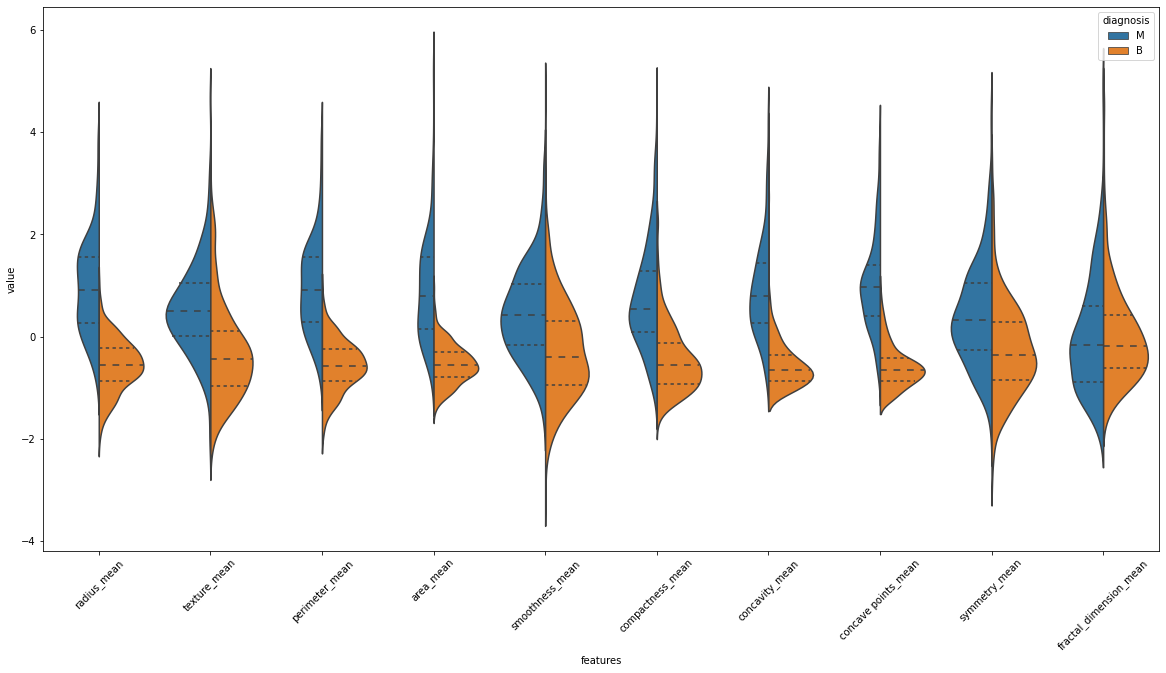

In [12]:
# first ten features
# --pandas--
x_features = data
data_n = (data - data.mean()) / (data.std())  # data normalization for plotting

# get all the features -- since axis = 1, Columnwise Concatenation
data_vis = pd.concat([y_target, data_n.iloc[:,0:10]], axis=1)

# let's flat the dataset
# `pd.melt` -- Unpivot the given DataFrame from wide format to long format 
# it Massages a DataFrame into a right format
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# --matplotlib--
plt.figure(figsize=(20,10))

# # --seaborn--
sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True, 
               inner = "quart"
               )

plt.xticks(rotation=45); # --matplotlib--

__Interpreting the above violin plot__: in the `texture_mean` the median value of Malignent & banign are well seprated as compare to `fractal_dimension_worst` where the median of two Coincide with each other, this means that this could be a good value feature for classification.


$pandas$
---

- [__Merge, Join and Concatenate DataFrames using Panda__](https://www.geeksforgeeks.org/python-merge-join-and-concatenate-dataframes-using-panda/)

- The `melt()` function is used to unpivot a given DataFrame from __wide format__ to __long format__, optionally leaving identifier variables set. Column(s) to use as identifier variables. Column(s) to unpivot. If not specified, uses all columns that are not set as `id_vars`.

## __Task 5: Violin Plots and Box Plots__

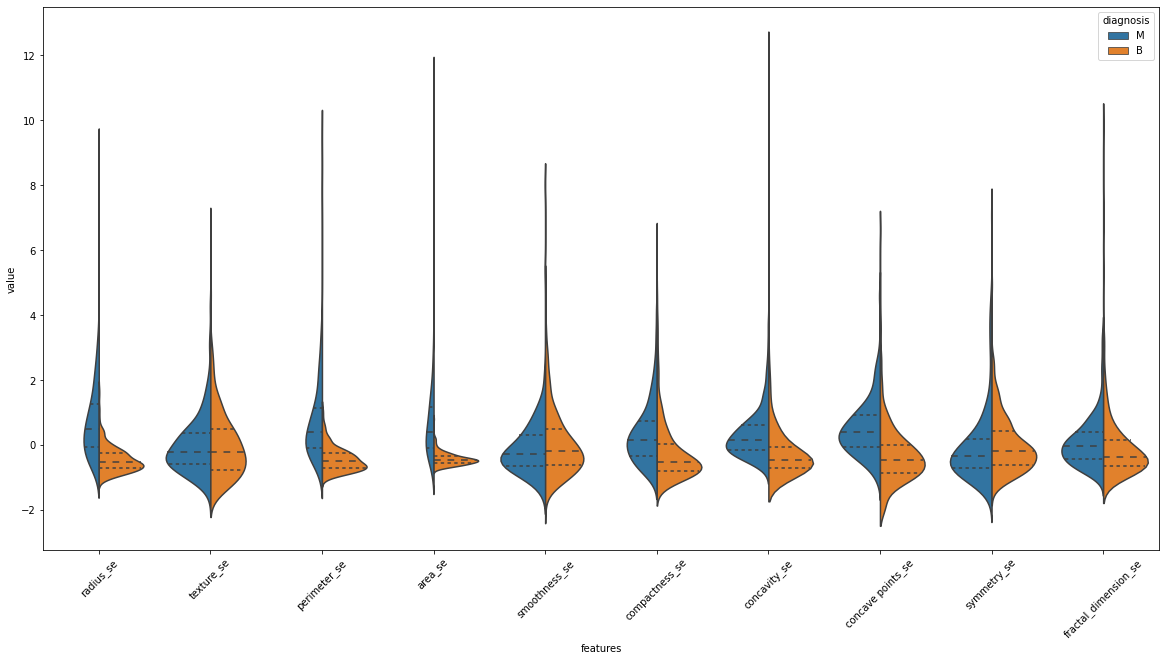

In [13]:
# Second ten features
data_vis = pd.concat([y_target, data_n.iloc[:,10:20]], axis=1)

data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))

sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True, 
               inner = "quart")

plt.xticks(rotation=45); # --matplotlib--

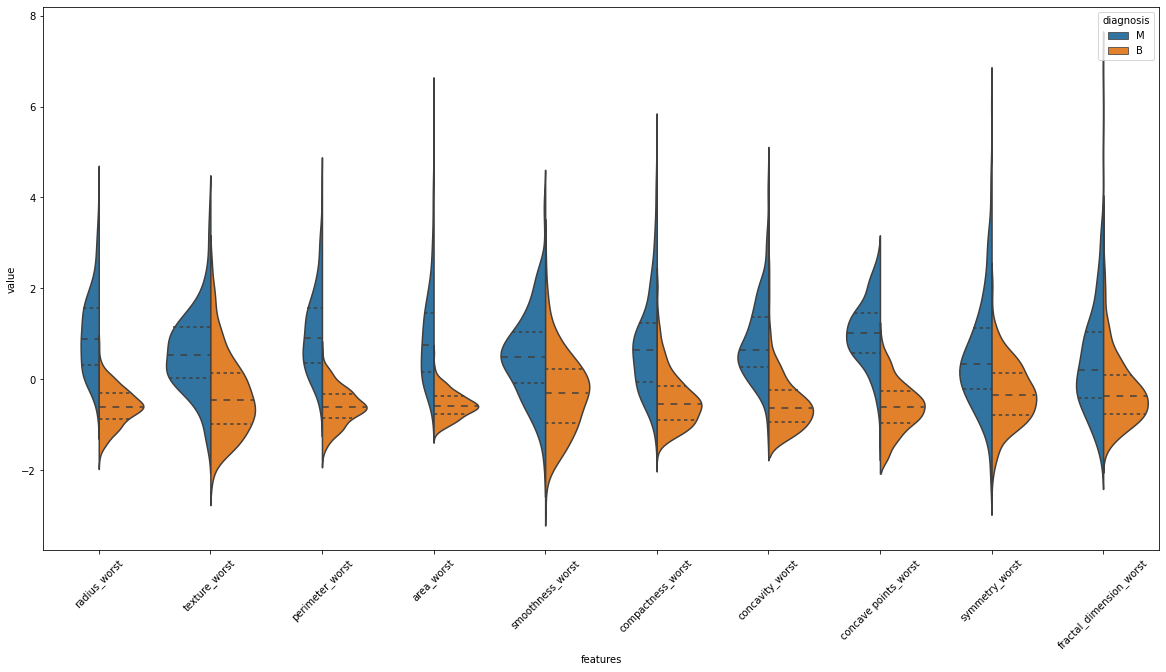

In [14]:
# Third ten features
data_vis = pd.concat([y_target, data_n.iloc[:,20:31]], axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))

sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True, 
               inner = "quart")

plt.xticks(rotation=45); # --matplotlib--

__Interpreting the above violin plot__: `Concavity_worst` & `Concave points_worst` looks very similar, So how can we decide that are they co-related with each other or not, if they are co-related with each other then the best practice is to reduce the redundancey by dropping one of the column.

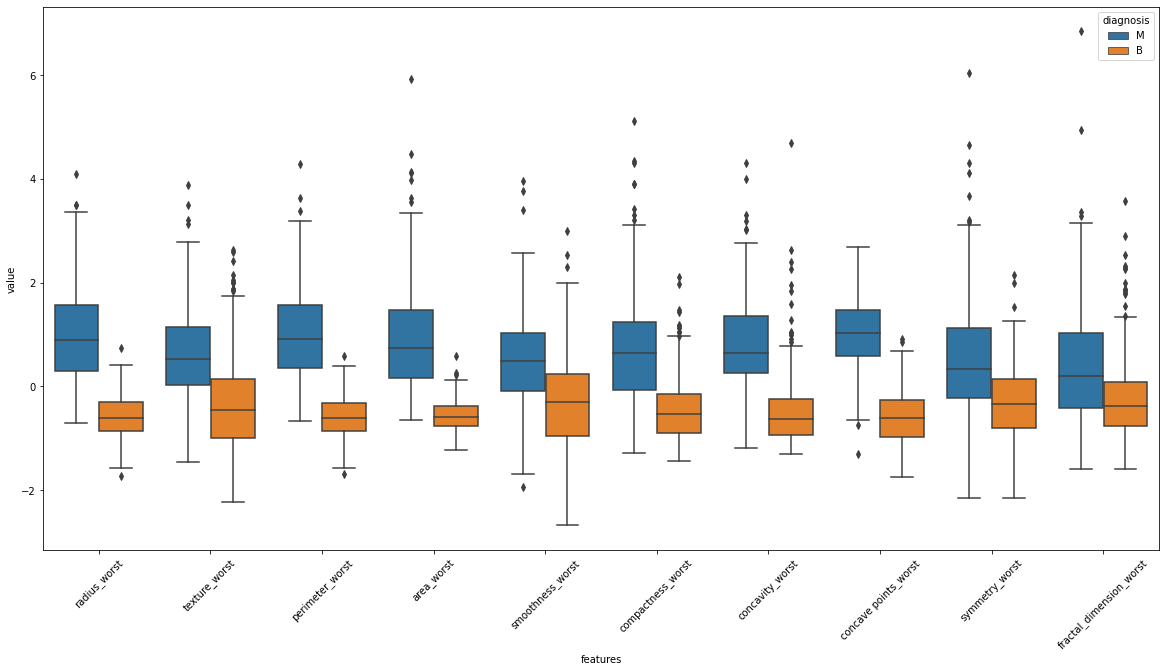

In [15]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(20,10))
sns.boxplot(x="features",
            y="value",
            hue="diagnosis",
            data=data_vis)

plt.xticks(rotation=45);

__BoxPlot__ are good alternative when we want to detect the __outliers__. 

## __Task 6: Using Joint Plots for Feature Comparison__

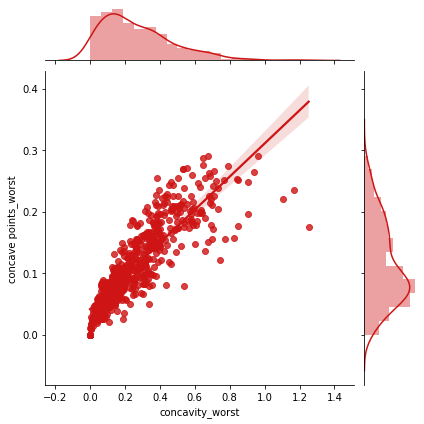

In [16]:
# Checking how co-related the two feature are
sns.jointplot(x_features.loc[:,'concavity_worst'],
              x_features.loc[:,'concave points_worst'],
              kind="regg",
              color="#ce1414");

By looking the above joint plot we can say that these two feature are highly Co-related.

[Plotting two distributions in seaborn.jointplot](https://stackoverflow.com/questions/31539815/plotting-two-distributions-in-seaborn-jointplot) 

## __Task 7: Uncovering Correlated Features with Pair Grids__

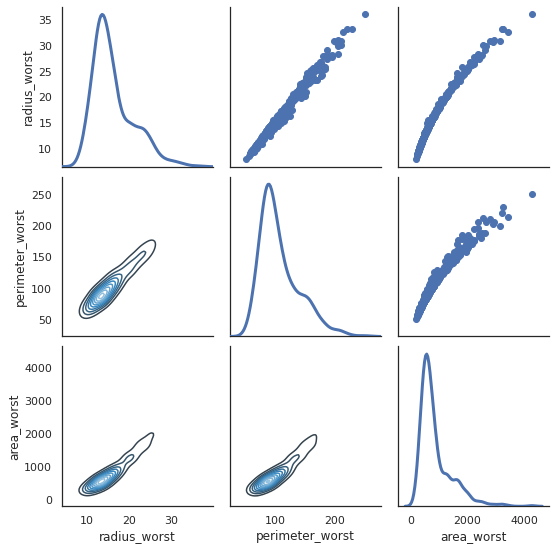

In [17]:
sns.set(style="white")
df = x_features.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

## __Task 8: Observing the Distribution of Values and their Variance with Swarm Plots__

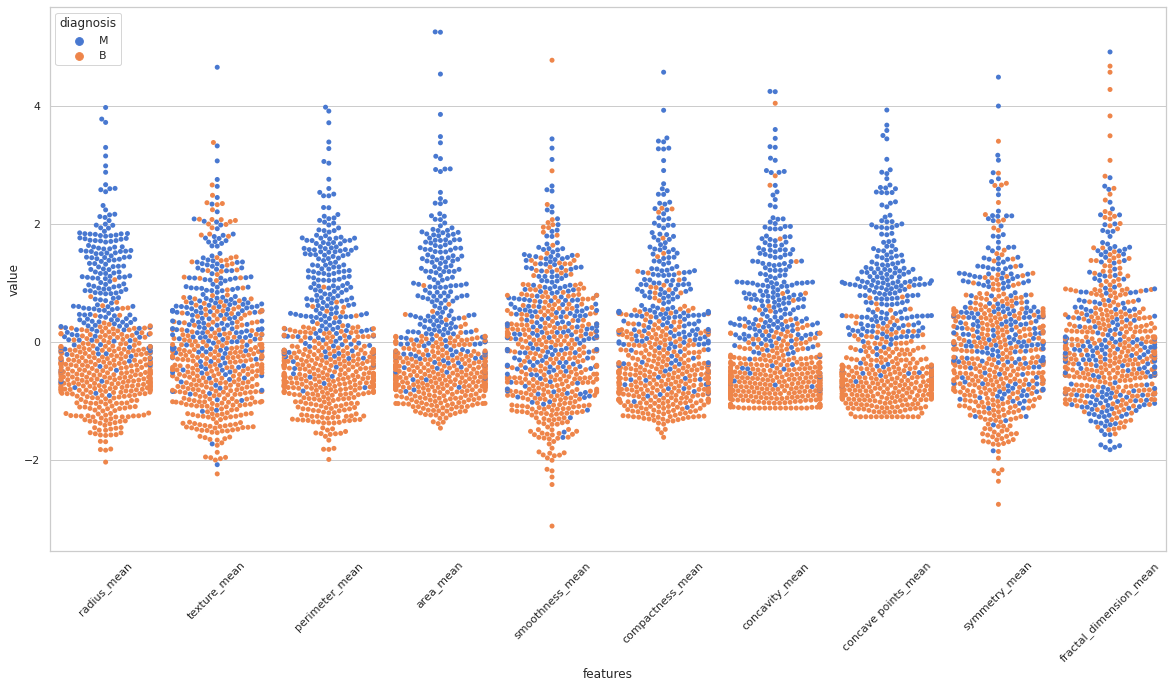

In [18]:
# First Ten features
sns.set(style="whitegrid", palette="muted")
data_dia = y_target #data diameter

data_n = (data - data.mean()) / (data.std())  

data_vis = pd.concat([y_target, data_n.iloc[:,0:10]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=45);

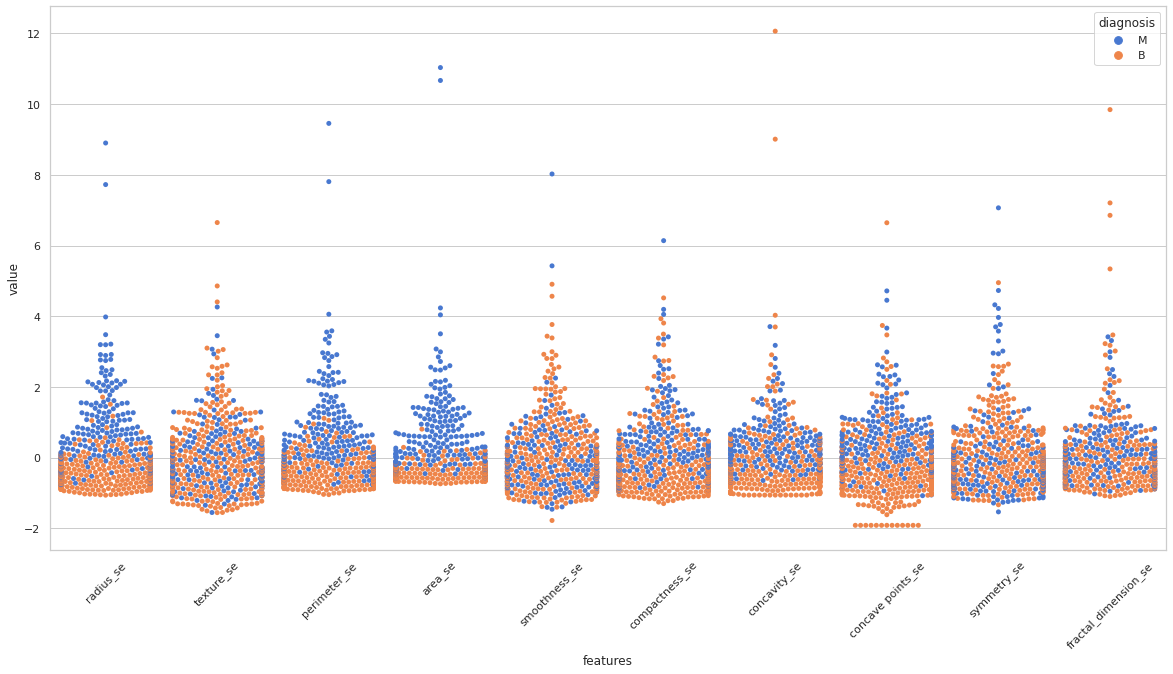

In [19]:
# Second ten features
data_vis = pd.concat([y_target, data_n.iloc[:,10:20]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=45);

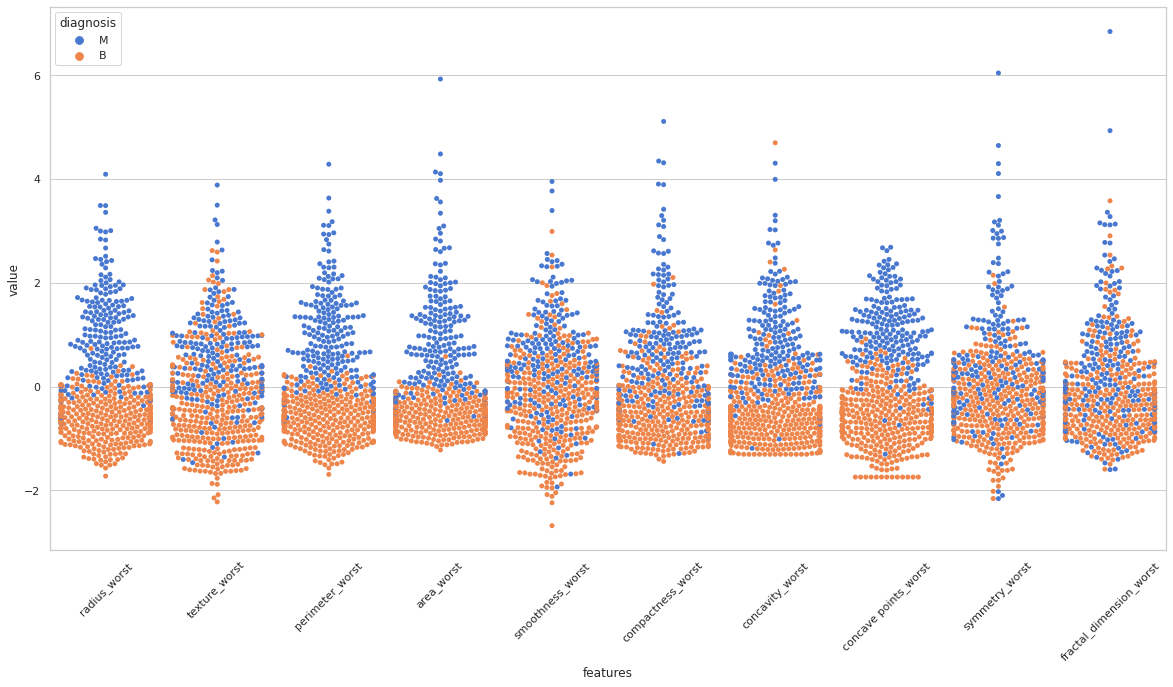

In [20]:
# Third ten features
data_vis = pd.concat([y_target, data_n.iloc[:,20:31]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=45);

A __swarm plot__ can be drawn on its own, but it is also a good complement to a __box__ or __violin plot__ in cases where you want to show all observations along with some representation of the underlying distribution.


> So by looking at the variance of __swarm plot__ we can tell how well seprated they are, & which features are best suitable for classification.


__how good we predict the target using correlation features__

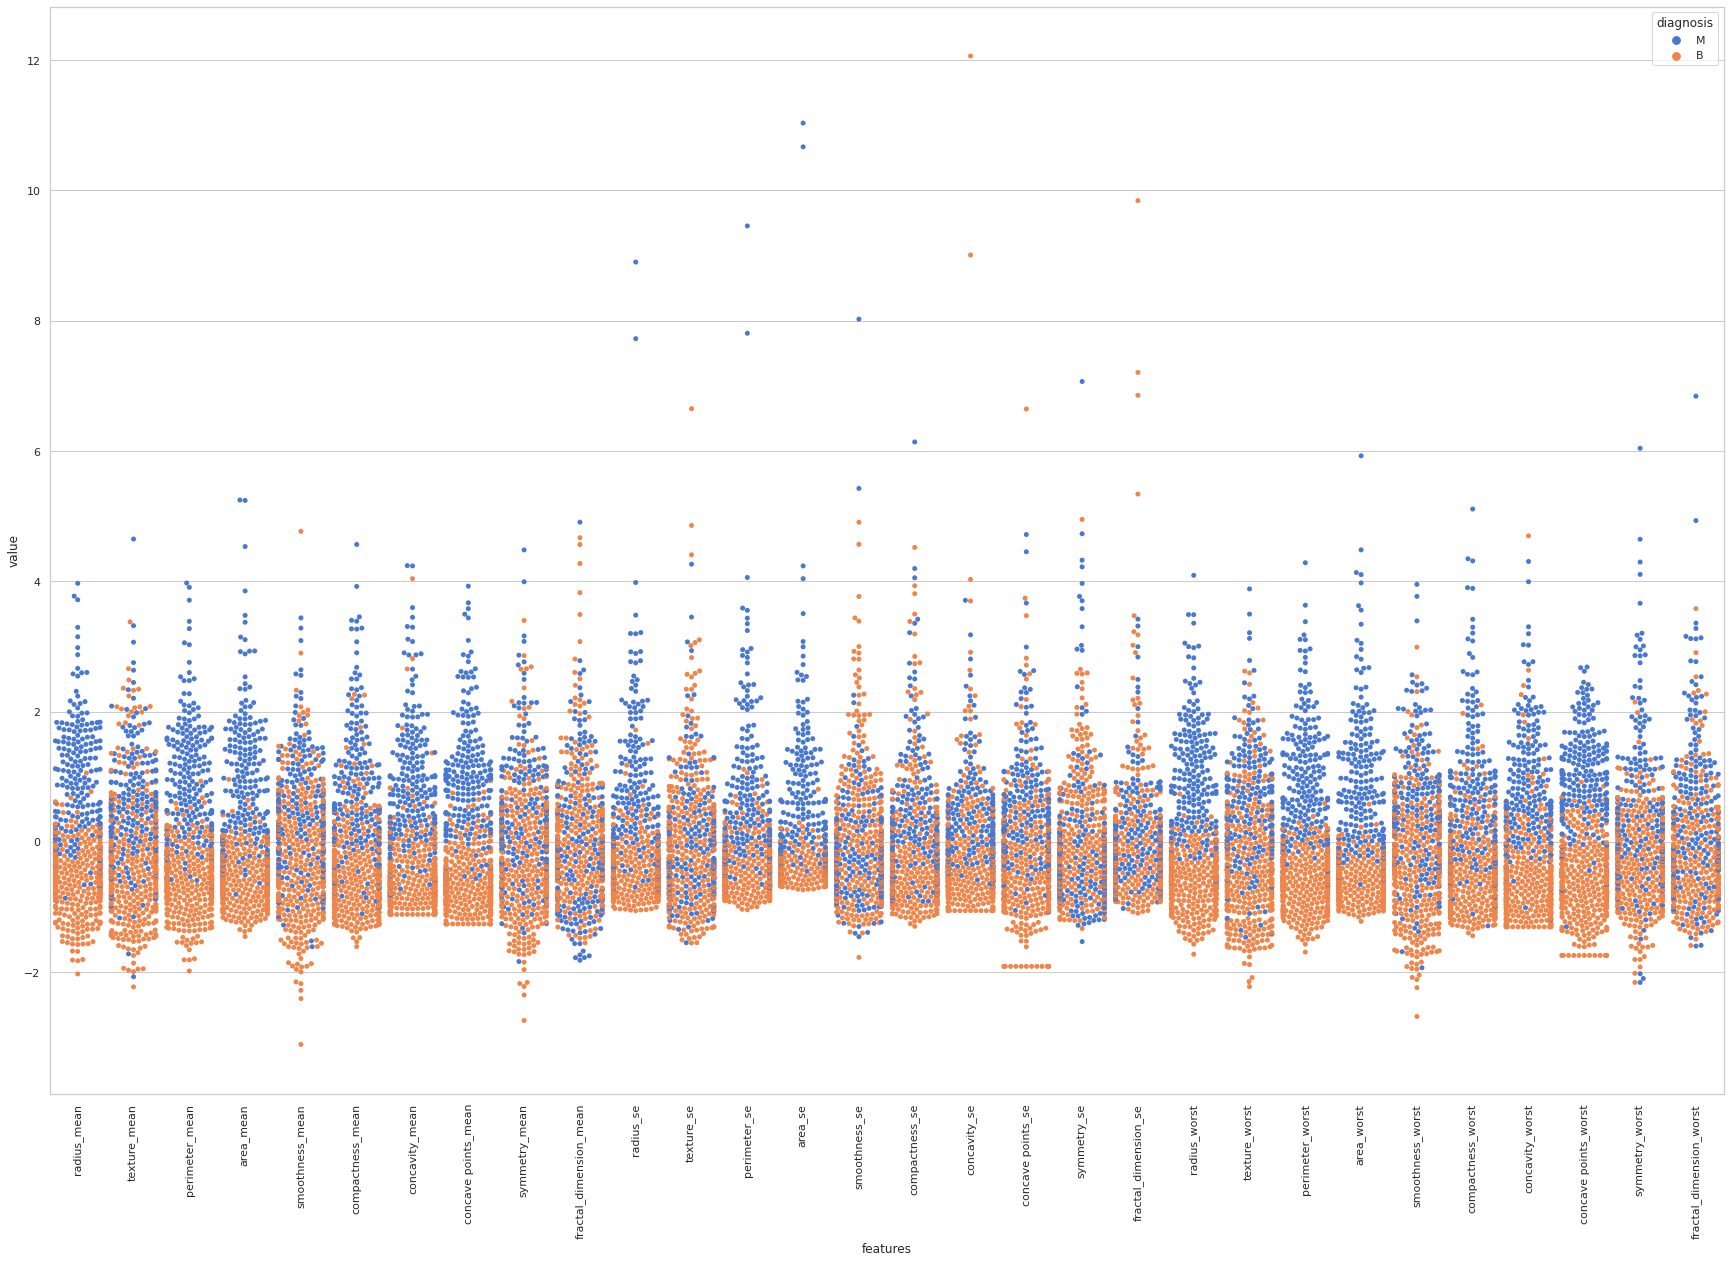

In [21]:
# Correlation of each feature and our target variable

data_vis = pd.concat([y_target, data_n.iloc[:,0:30]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(30,20))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=90);

## __Task 9: Observing all Pair-wise Correlations__

__How can one interpret a heat map plot?__

- Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1.

- Values closer to zero means there is no linear trend between the two variables. 

- The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.

- A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. 


- The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation).

- For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

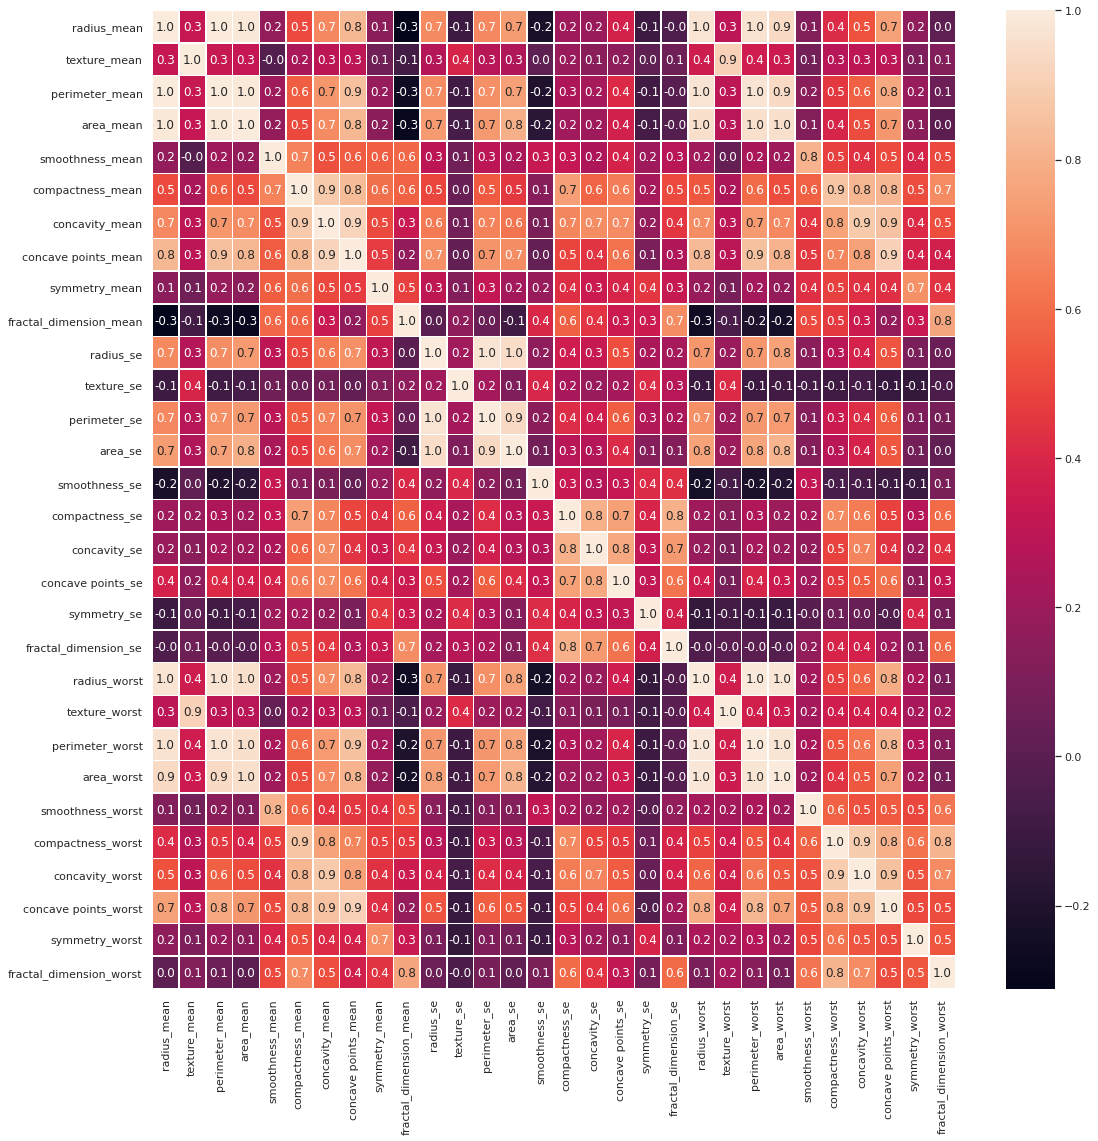

In [22]:
# Pair-wise correlation across all the varible
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

__white cell__ $\rightarrow$ __Highly Correlated__

__Black Cell__ $\rightarrow$ __Non-correlated__